[[167   1]
 [  0  31]]
             precision    recall  f1-score   support

          0       1.00      0.99      1.00       168
          1       0.97      1.00      0.98        31

avg / total       1.00      0.99      1.00       199

0.994974874372


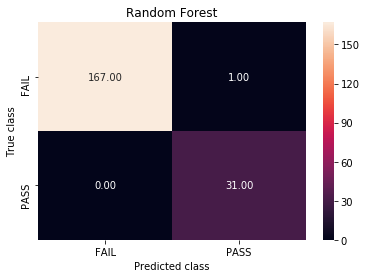

In [19]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

data = pd.read_csv("posca_factor_ping-final.csv",usecols=[2,3,4,5,6],engine='python')  

#print(data.shape)

x = data.drop('result', axis=1)  
y = data['result']  

#print(x.head())
  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0) 

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

from sklearn.ensemble import RandomForestClassifier


rrf_model = RandomForestClassifier(max_depth=10,n_estimators=10)  
rrf_model.fit(X_train, y_train)  
y_pred = rrf_model.predict(X_test)  

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result=confusion_matrix(y_test,y_pred)
print(result)
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

sns.heatmap(result, annot=True, fmt='.2f',xticklabels = ["FAIL", "PASS"] , yticklabels = ["FAIL", "PASS"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')